In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import math

Firstly, some notations made:

**$K(m,n,r,s)=w(r,s)w*(-r,-s)f(m+r,n+s)f*(m-r,n-s)$**

**$W=\exp(-j4\pi/N)$**

According to [1], the 2D discrete windowed WVD is defined as:

### $W(m,n,u,v)=4 {\sum\limits_{r=-L}^{L} \sum\limits_{s=-L}^{L} K(m,n,r,s)W(rp+sq)}$   (2)

In [14]:
def loadMatFile(file_path, file_name, key):
    """
    Load a mat file and return an item of the dictionary loaded.
    """    
    # read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)
    
    # access item of a dictionary
    array = dictionary[key]
    
    return array

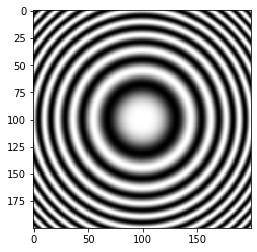

In [99]:
# Folder's path
#path = 'C:\\Users\\flucasamar\\Desktop\\Github\\computerGeneratedHolography'
path = 'C:\\Users\\ferna\\Desktop\\computerGeneratedHolography\\'

# Load and plot a specific example
file_path = path + '\\output\\main\\'
file_name = 'hol_center.mat'
key = 'hologram_out'
hol_center = loadMatFile(file_path, file_name, key)

plt.imshow(np.real(hol_center), cmap = 'gray')
plt.show()

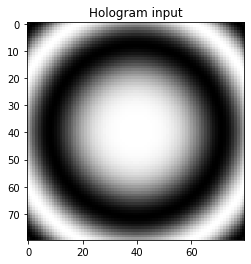

N: 80
Sum range values: 80
W: (80, 80)
f: (160, 160)


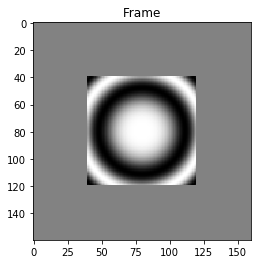

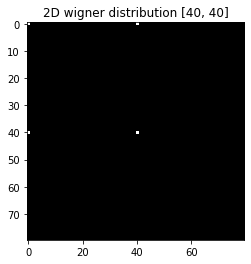

Wall time: 11min 11s


In [175]:
%%time
# Reduce input image (overflow problem)
hol_center_reduced = np.ones([80, 80], dtype = complex)
hol_center_reduced[:,:] = hol_center[60:140, 60:140]

# Plot image
plt.imshow(np.real(hol_center_reduced), cmap = 'gray')
plt.title('Hologram input')
plt.show()

# Samples of the input image
N = hol_center_reduced.shape[0]
rows = hol_center_reduced.shape[0]
columns = hol_center_reduced.shape[1]
print('N: %d' % (N))

# Position in the input image
x = 40
y = 40

# Positions in 2D wigner matrix
mu = np.arange(N)
mv = np.arange(N)

# Sum range values
kx = np.arange(-N/2, N/2) # -N/2, N/2 - 1
ky = np.arange(-N/2, N/2) # -N/2, N/2 - 1
print('Sum range values: %d' % (kx.shape))

W = np.ones([N, N], dtype = complex)
print('W: ' + str(W.shape))

# Determine framing background image
h = int(N/2)
f = np.ones([rows + 2*h, columns + 2*h], dtype = complex)
print('f: ' + str(f.shape))

# Insert image into the frame
f[h:rows+h, h:columns+h] = hol_center_reduced

# Plot background image
plt.imshow(np.real(f), cmap = 'gray')
plt.title('Frame')
plt.show()

#aux_x = f[x + h + kx, y + h + ky]
#print(aux_x.shape)

aux = 0
for u in mu:
    for v in mv:
        aux = 0
        for kx_i in kx:
            for ky_i in ky:
                # Kernel function
                K = f[int(x + h + kx_i), int(y + h + ky_i)] * np.conj(f[int(x + h + kx_i), int(y + h + ky_i)])
                aux = K * np.exp(-2j * ((2 * np.pi * u / N) * kx_i + (2 * np.pi * v / N) * ky_i)) + aux
        # Update
        W[u,v] = 4*aux

'''
for u in mu:
    for v in mv:
        # Sums
        aux = np.exp(-2j * ((2 * np.pi * u / N) * kx + (2 * np.pi * v / N) * ky))
        aux_sum = np.sum(aux)
        # Update
        W[u,v] = aux_sum        
'''

# Plot result
plt.imshow(np.real(W), cmap = 'gray')
plt.title('2D wigner distribution [%d, %d]' %(x, y))
plt.show()

In [82]:
# Problems with overflow, two ways of compute, differents results, which is the correct ?

# u, v positions in the 2D wigner matrix
u = 1
v = 1

# Number of samples of the image
N = 200 

# Sum range values
xx = np.arange(-40, 40) # overflow after -50, 50
print(xx.shape)

# Try 1
aux1 = np.exp(-2j * ((2 * np.pi * u / N) * xx))
print(aux1.shape)
print(np.sum(aux1))

# Try 2
aux2 = 0
for i in xx:
    aux2 = np.exp(-2j * ((2 * np.pi * u / N) * i)) + aux2
print(aux2)

(80,)
(80,)
(18.703629997965688+0.5877852522924769j)
(18.703629997965688+0.5877852522924734j)
